# SMOTE


In [54]:
import pandas as pd
import numpy as np
data = pd.read_csv('breast cancer.csv')
from sklearn import svm 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
print(data.shape)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print("before oversampling #1 = ", sum(y_train == 1))
print("before oversampling #0 = ", sum(y_train == 0))

sm = SMOTE(random_state=42)
x_res,y_res = sm.fit_resample(x_train, y_train)
print("after oversampling #1 = ", sum(y_res == 1))
print("after oversampling #0 = ", sum(y_res == 0))


(194, 21)
before oversampling #1 =  33
before oversampling #0 =  102
after oversampling #1 =  102
after oversampling #0 =  102


# Sampling


(768, 9)
(100, 9)


<Axes: xlabel='Glucose', ylabel='BloodPressure'>

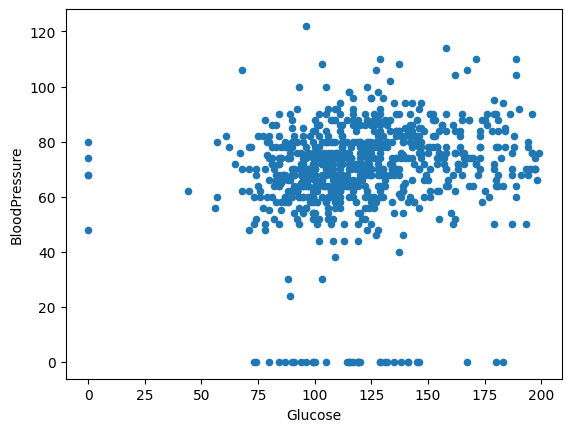

In [55]:
data = pd.read_csv('diabetes.csv')
print(data.shape)
sample = data.sample(n=100, replace=False) # set replace to false to avoid dublication
print(sample.shape)
data
data.plot.scatter(x='Glucose', y='BloodPressure')
# import seaborn as sns
# sns.boxplot(data['Glucose'])

# Local-Data


In [56]:
# import sklearn
# from sklearn.datasets import fetch_california_housing
# import matplotlib.pyplot as plt
# dataset = fetch_california_housing(as_frame= True)
# data = pd.DataFrame(dataset.data)
# col_name = dataset.feature_names
# data.columns = col_name
# data.head()
# import seaborn as sns
# sns.boxplot(data['DIS'])

# Pandas-Profiling


In [57]:
import pandas_profiling as pp
# pp.ProfileReport(data)

# PCA


[0.88854663 0.06159078 0.02579012 0.01308614 0.00744094]


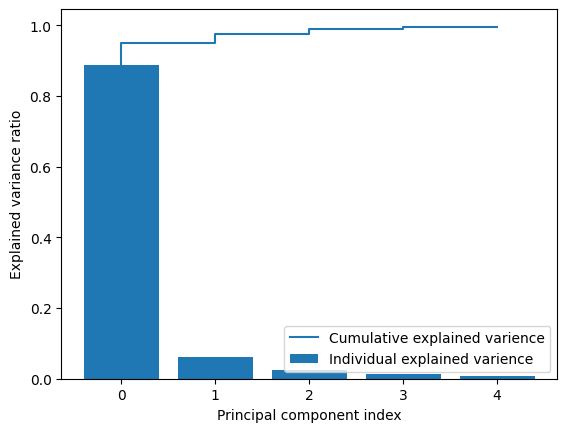

In [58]:
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df = pd.read_csv('diabetes.csv')
X = df.drop('Outcome',axis=1)
y = df['Outcome']
pca = PCA(n_components=5)
principalCompoents = pca.fit_transform(X)
principalDF = pd.DataFrame(data = principalCompoents, columns=['A','B','C','D','E'])
finalDf = pd.concat([principalDF,y], axis=1)

finalDf.to_csv("pcadata.csv", index=False, header=True)
exvar = pca.explained_variance_ratio_
cexvarsum = np.cumsum(exvar)
print(exvar)
plt.bar(range(0,len(exvar)), exvar, label="Individual explained varience")
plt.step(range(0,len(cexvarsum)), cexvarsum, label="Cumulative explained varience")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='lower right')
plt.show()

[[142  12]
 [ 39  38]]
accuracy 0.7792207792207793
precision 0.76
recall 0.4935064935064935
f1-measure 0.5984251968503937
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       154
           1       0.76      0.49      0.60        77

    accuracy                           0.78       231
   macro avg       0.77      0.71      0.72       231
weighted avg       0.78      0.78      0.76       231

0.7077922077922078


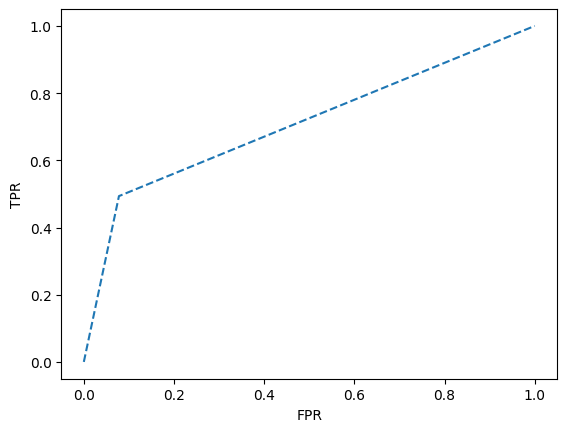

In [59]:
data = pd.read_csv('pcadata.csv')
X = data.drop('Outcome', axis=1)
y = data['Outcome']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(x_train, y_train)

predictions = rf.predict(x_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print(matrix)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)
print("accuracy", acc)

from sklearn.metrics import precision_score
pre = precision_score(y_test, predictions)
print("precision", pre)

from sklearn.metrics import recall_score
rec = recall_score(y_test, predictions)
print("recall", rec)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions)
print("f1-measure", f1)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

from sklearn.metrics import roc_curve
from matplotlib import pyplot

fpr, tpr, _ = roc_curve(y_test, predictions)
pyplot.plot(fpr, tpr, linestyle ='--', label='original')
plt.xlabel("FPR")
plt.ylabel("TPR")

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, predictions))




# SVM


In [60]:
from sklearn import svm
data = pd.read_csv('pcadata.csv')
X = data.drop('Outcome', axis=1)
y = data['Outcome']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

classifire = svm.SVC(kernel="rbf")
classifire.fit(x_train, y_train)

predictions = classifire.predict(x_test)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, predictions)
print(matrix)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)
print("accuracy", acc)

from sklearn.metrics import precision_score
pre = precision_score(y_test, predictions)
print("precision", pre)

from sklearn.metrics import recall_score
rec = recall_score(y_test, predictions)
print("recall", rec)

from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions)
print("f1-measure", f1)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

[[145   7]
 [ 39  40]]
accuracy 0.8008658008658008
precision 0.851063829787234
recall 0.5063291139240507
f1-measure 0.6349206349206349
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       152
           1       0.85      0.51      0.63        79

    accuracy                           0.80       231
   macro avg       0.82      0.73      0.75       231
weighted avg       0.81      0.80      0.79       231



# Decision Tree


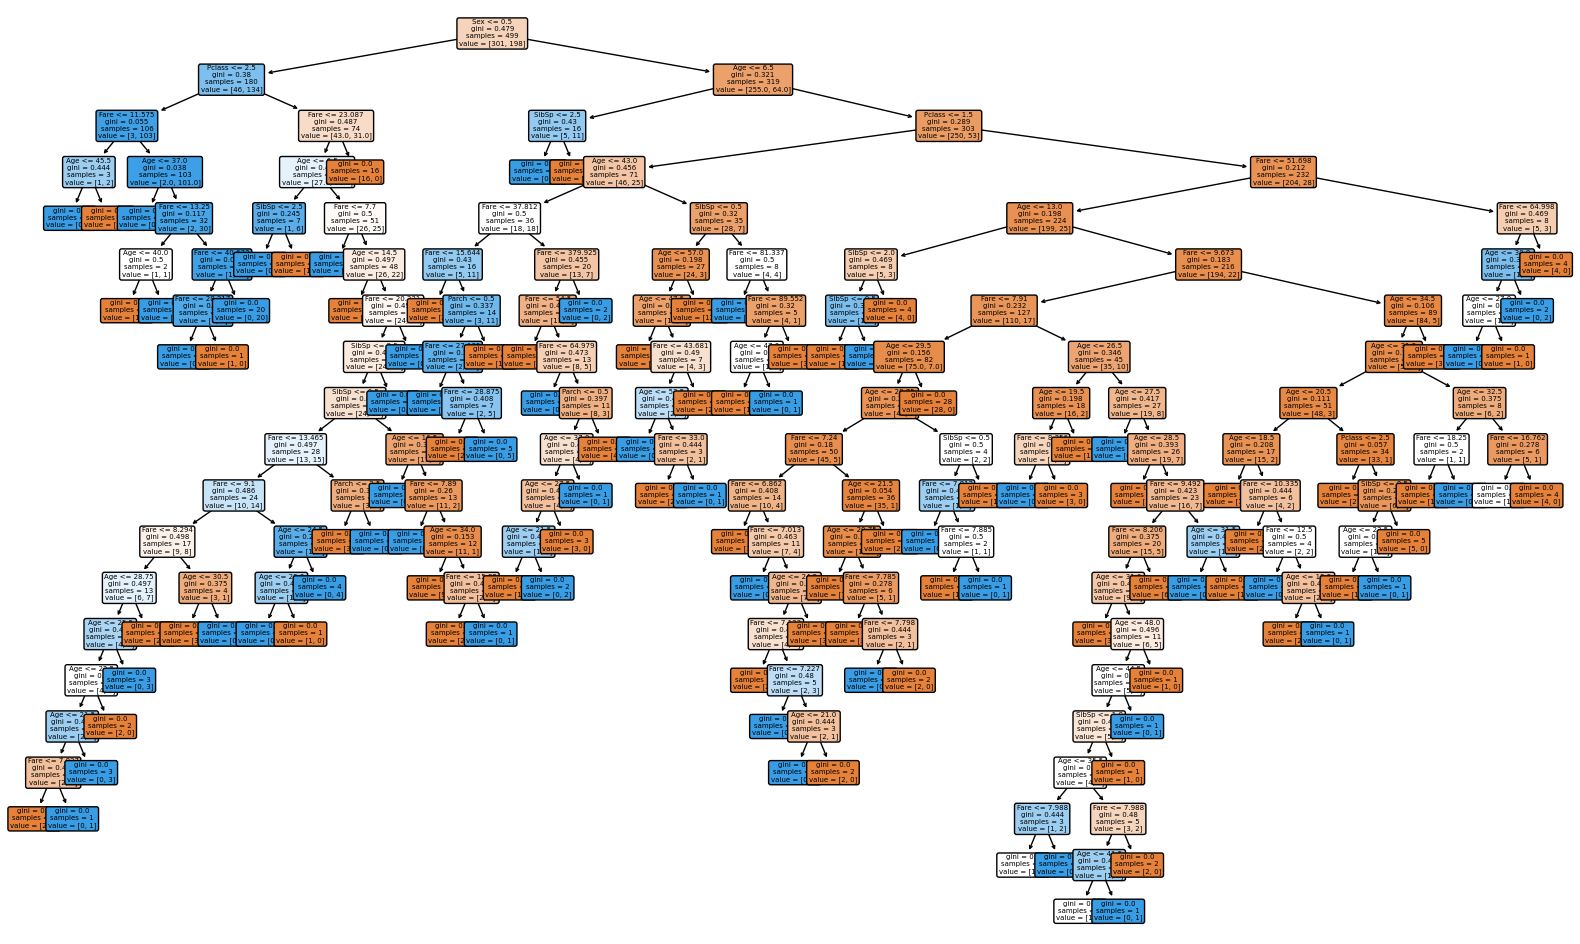

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')
data = data.loc[:, ('Survived','Pclass','Sex','Age','SibSp','Parch','Fare')]
data.dropna(inplace=True)
# data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Sex = le.fit_transform(data.Sex)
# data
X= data.iloc[:, 1:]
y= data.iloc[:, 0]

x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=0.3)

dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)
predictions = dtree.predict(x_test)

accuracy_score(y_test, predictions)

plt.figure(figsize=(20,12))
tree.plot_tree(dtree,feature_names=X.columns, filled=True, rounded=True ,fontsize=5)
plt.savefig('tree.png', dpi=100)
plt.show()






# Linear Regression


intercept 7.105427357601002e-15
cof [ 1.00000000e+00 -5.08179178e-19]
   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes
mean abs error 0.0
mean abs error 0.0
root mean abs error 0.0


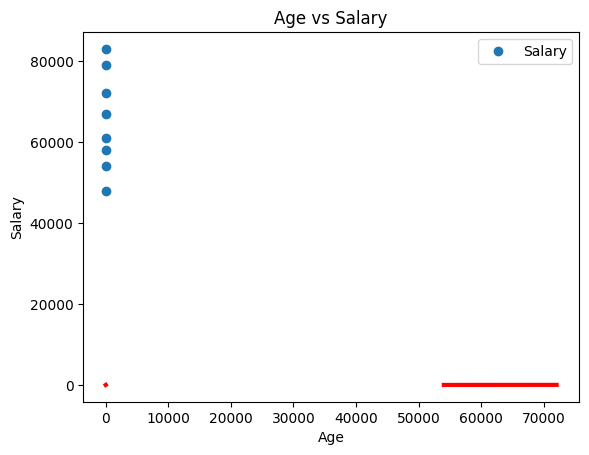

In [65]:
dataset = pd.read_csv('Data.csv')
dataset.dropna(inplace=True)
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,1].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.3)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
print("intercept", reg.intercept_)
print("cof", reg.coef_)
predict = reg.predict(x_test)
data = pd.DataFrame({"Actual":y_test,"Predicted": predict})
print(dataset)
from sklearn import metrics
print("mean abs error", metrics.mean_absolute_error(y_test, predict))
print("mean abs error", metrics.mean_squared_error(y_test, predict))
print("root mean abs error",np.sqrt(metrics.mean_squared_error(y_test, predict)))

dataset.plot(x='Age', y='Salary', style='o')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.plot(x_test, predict, color="red", linewidth=3)
plt.show()